['base', 'blur']
255
0


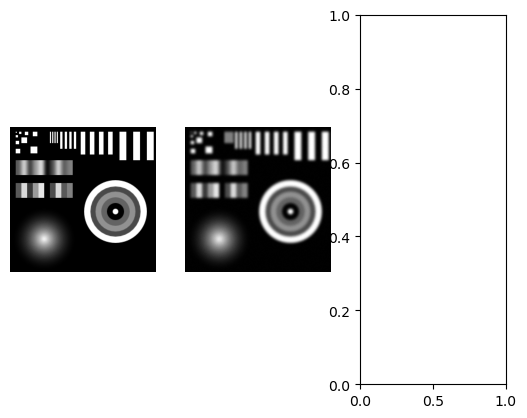

In [26]:
import numpy as np
import matplotlib.pyplot as plt

imgs = np.load('demo.npz')
print(imgs.files)
ogimg = imgs['base']
blimg = imgs['blur']
#dbimg = imgs['arr_2']
print(np.max(ogimg))
print(np.min(ogimg))

fig, axs = plt.subplots(1,3)
axs[0].imshow(ogimg, cmap='gray', vmin=0, vmax=255)
axs[0].axis('off')
axs[1].imshow(blimg, cmap='gray', vmin=0, vmax=255)
axs[1].axis('off')
#axs[2].imshow(dbimg, cmap='gray', vmin=0, vmax=255)
#axs[2].axis('off')
plt.show()

In [36]:
big_solns = np.load("demo_TV.npz")
samples = np.load("samples.npz")["samples"]

print(np.max(samples))
print(np.min(samples))
print(np.mean(samples))

4.076699941899433
0.8830224019570607
2.4962657633181404


255
0


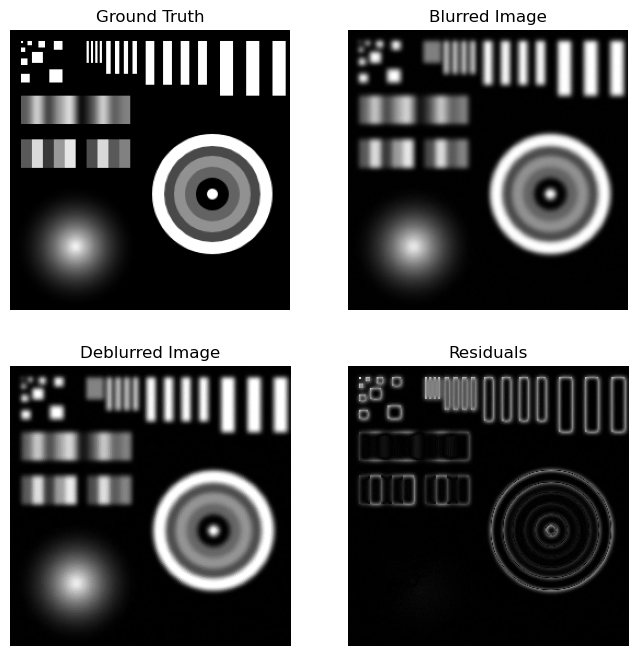

255
0


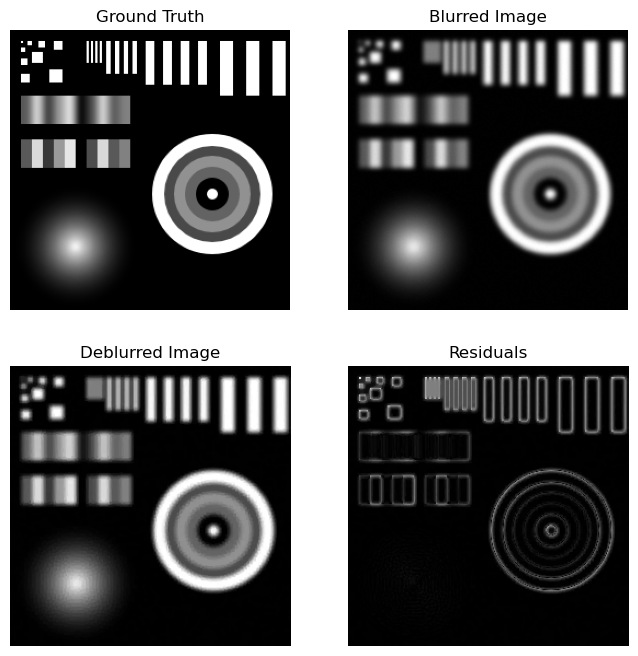

255
0


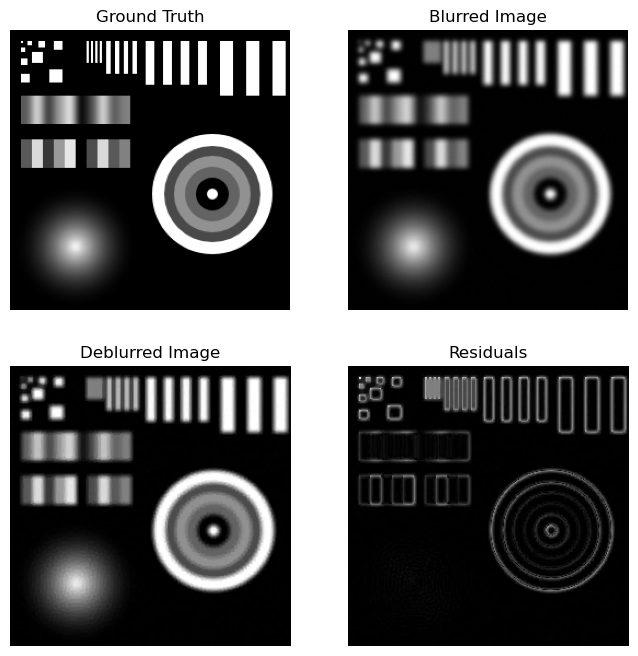

255
0


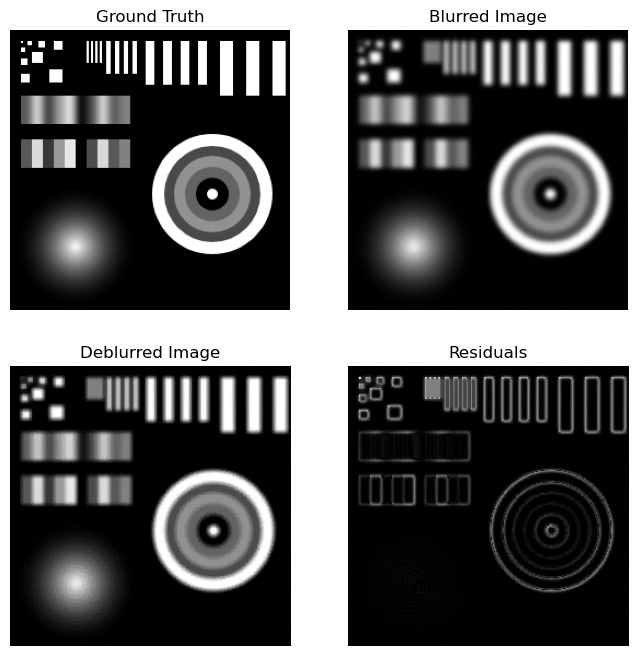

255
0


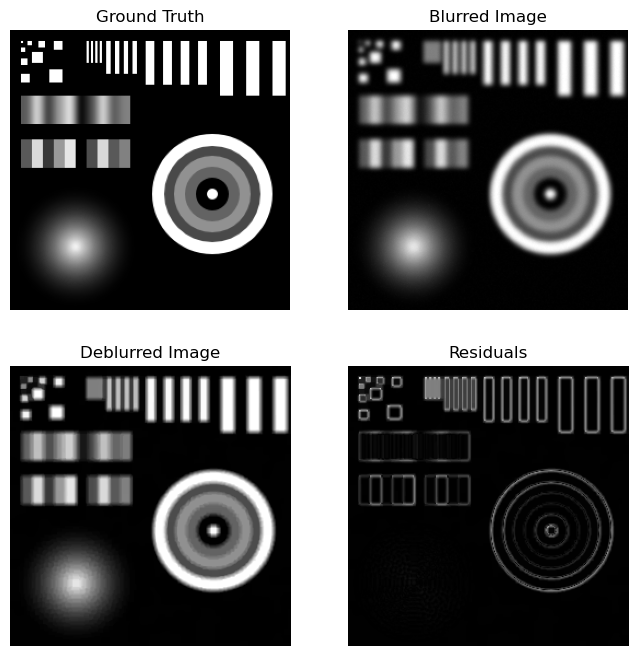

255
0


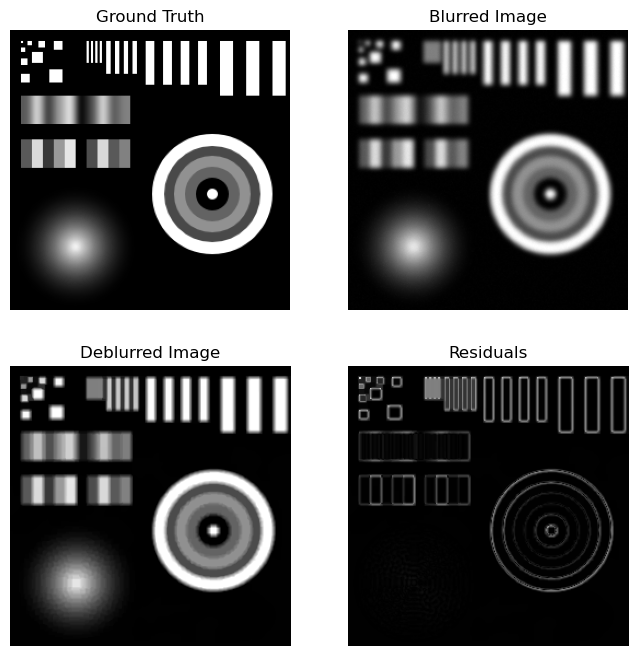

255
0


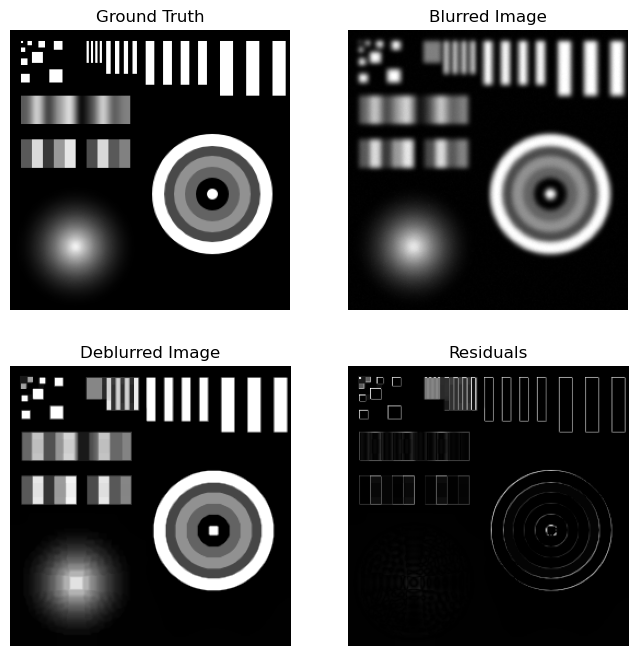

In [37]:
for file in big_solns.files:
        img = big_solns[file]
        print(np.max(img))
        print(np.min(img))
        fig, axs = plt.subplots(2,2)
        fig.set_size_inches(8,8)
        axs[0,0].imshow(ogimg, cmap='gray', vmin=0, vmax=255)
        axs[0,0].axis('off')
        axs[0,0].set_title('Ground Truth')
        axs[0,1].imshow(blimg, cmap='gray', vmin=0, vmax=255)
        axs[0,1].axis('off')
        axs[0,1].set_title('Blurred Image')
        axs[1,0].imshow(img, cmap='gray', vmin=0, vmax=255)
        axs[1,0].axis('off')
        axs[1,0].set_title('Deblurred Image')
        axs[1,1].imshow(np.abs(img.astype(np.float32)-ogimg.astype(np.float32)), cmap='gray', vmin=0, vmax=255)
        axs[1,1].axis('off')
        axs[1,1].set_title('Residuals')
        #fig.suptitle(f"{file}")
        plt.show()
    

In [ ]:
def mse(true_image, test_image):
    return np.sum(np.square(true_image - test_image))
    

In [ ]:
from scipy.ndimage import uniform_filter

def compute_ssim(image1, image2, data_range=255, window_size=7):
    """
    Compute SSIM index between two images using NumPy and SciPy.

    Parameters:
    - image1, image2: Input images (must be normalized to [0, 1] or scaled to [0, data_range]).
    - data_range: Dynamic range of the input images (e.g., 1.0 for normalized images).
    - window_size: Size of the sliding window for local statistics (default 7x7).

    Returns:
    - ssim: Scalar SSIM index.
    """
    # Constants for numerical stability
    C1 = (0.01 * data_range) ** 2
    C2 = (0.03 * data_range) ** 2

    # Ensure inputs are float arrays
    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)

    # Sliding window mean
    mu1 = uniform_filter(image1, size=window_size)
    mu2 = uniform_filter(image2, size=window_size)

    # Sliding window variance and covariance
    sigma1_sq = uniform_filter(image1 ** 2, size=window_size) - mu1 ** 2
    sigma2_sq = uniform_filter(image2 ** 2, size=window_size) - mu2 ** 2
    sigma12 = uniform_filter(image1 * image2, size=window_size) - mu1 * mu2

    # SSIM formula
    numerator1 = 2 * mu1 * mu2 + C1
    numerator2 = 2 * sigma12 + C2
    denominator1 = mu1 ** 2 + mu2 ** 2 + C1
    denominator2 = sigma1_sq + sigma2_sq + C2

    ssim_map = (numerator1 * numerator2) / (denominator1 * denominator2)
    return np.mean(ssim_map)  # Return the mean SSIM over all windows

In [ ]:
TV_ARCHIVE = np.load("TIK_SSIM_Batch.npz")
TENSOR = np.zeros((256,256,len(TV_ARCHIVE)), dtype=np.uint8)

best_mse = float('inf')
best_arr_mse = np.zeros((256,256), dtype=np.uint8)
best_arr_ssim = best_arr_mse.copy()
best_ssim = -float('inf')

best_sigma_mse = 0
best_sigma_ssim = 0
iterator = 0
for file in TV_ARCHIVE.files:
    arr = TV_ARCHIVE[file]
    local_mse = mse(ogimg[16:240, 16:240], arr[16:240, 16:240])
    local_ssim = compute_ssim(ogimg[16:240, 16:240], arr[16:240, 16:240])
    if local_mse < best_mse:
       best_mse = local_mse
       best_arr_mse = arr
       best_sigma_mse = float(file)
    if local_ssim > best_ssim:
        best_ssim = local_ssim
        best_arr_ssim = arr
        best_sigma_ssim = float(file)
    TENSOR[:,:,iterator] = arr
    iterator += 1

fig, axs = plt.subplots(1,3)
axs[0].imshow(ogimg[16:240, 16:240], cmap='gray', vmin=0, vmax=255)
axs[0].axis(False)
axs[1].imshow(best_arr_mse[16:240, 16:240], cmap='gray', vmin=0, vmax=255)
axs[1].axis(False)
axs[2].imshow(best_arr_ssim[16:240, 16:240], cmap='gray', vmin=0, vmax=255)
axs[2].axis(False)
fig.tight_layout()
plt.show()